In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### PARTE 1: Carga y limpieza

In [2]:
## 1. Carga de csv
df = pd.read_csv("./diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
## 2. Limpieza de valores error: 
    # hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.
df= df.replace('?',np.nan)

In [4]:
## 3. Limpieza de nulos (limpiar valores NaN):
    # Nulos en columnas continuas: mediana, media
    # Nulos en columnas categóricas: moda
df.isnull().sum()

carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64

In [5]:
# Limpieza de nulos
df["carat"] = df["carat"].fillna(df["carat"].mean().round(2))
df["cut"] = df["cut"].fillna(df["cut"].mode().iloc[0])
df["color"] = df["color"].fillna(df["color"].mode().iloc[0])
df["clarity"] = df["clarity"].fillna(df["clarity"].mode().iloc[0])
df["table"] = df["table"].fillna(df["table"].median())
df["price"] = df["price"].fillna(df["price"].mode().iloc[0])
df["x"] = df["x"].fillna(df["x"].mode().iloc[0])
df["y"] = df["y"].fillna(df["y"].mean().round(2))
df["z"] = df["z"].fillna(df["z"].mean().round(2))

In [6]:
## 4. Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  object 
 7   x        53940 non-null  object 
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [7]:
df[["cut", "color", "clarity"]] = df[["cut", "color", "clarity"]].astype("category")
df["carat"] = df["carat"].astype("float32").round(2) # Si se cambia a float16 sale aviso de desbordamiento
df["price"] = df["price"].astype("int64")
df["x"] = df["x"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float32 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float32(1), float64(5), int64(1)
memory usage: 2.8 MB


In [8]:
## 5. Encoding: texto a numérico
    # Uso de la función get_dummies() para encoding one_hot
    # Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

In [9]:
df_encoded = pd.get_dummies(df, columns=["color"])
df_encoded.head(1)

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,SI2,61.5,55.0,326,3.95,3.98,2.43,False,True,False,False,False,False,False


In [10]:
mapeo_cut = {
    "Ideal" : 1,
    "Premium" : 2,
    "Very Good" : 3,
    "Good" : 4,
    "Fair" : 5    
}

In [11]:
df["cut_int"] = df["cut"].map(mapeo_cut) # pasar a entero

In [12]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4


### PARTE 2: Transformaciones

In [13]:
## 1. Uso de función apply:
    # crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)
def add_iva (price, iva= 0.21):
    return price + (price * iva)

In [14]:
df["price_iva"] = df["price"].apply(add_iva)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,394.46
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,394.46
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,395.67


In [15]:
## 2. Crear una columna price_discount usando apply a partir de la columna price(con lambda o def):
# price < 1000 and cut == 'Ideal' entonces 10 % descuent
# 1000 <= price <= 5000 and cut == 'Premium' entonces 15 % descuento
# si no entra en las condiciones sin descuento, devolver el precio original

def discount (df):
    if df["price"] < 1000 and df["cut"] == "Ideal":
        return df["price"] - df["price"] *0.10
    elif 1000 <= df["price"] <= 5000 and df["cut"] == "Premium":
        return df["price"] - df["price"] * 0.15
    else:
        return df["price"]  

In [16]:
df["price_discount"] = df.apply(discount, axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,394.46,293.4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,394.46,326.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,395.67,327.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2,404.14,334.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4,405.35,335.0


In [17]:
## 3. Crear una nueva columna volumen combinando: x * y * z
df["volumen"] = (df["x"] * df["y"] * df["z"])
df["volumen"] = df["volumen"].astype("float64").round(2)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,394.46,293.4,38.20
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,394.46,326.0,34.51
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,395.67,327.0,38.08


In [18]:
## 4. Ordenar por dos columnas con sort_values():
    # tipo de corte (cut) y precio (price)

In [19]:
df.sort_values(["cut", "price"]).head(5) # ascendente

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,5,407.77,337.0,36.43
28270,0.25,Fair,E,VS1,55.2,64.0,361,4.21,4.23,2.33,5,436.81,361.0,41.49
31611,0.23,Fair,G,VVS2,61.4,66.0,369,3.87,3.91,2.39,5,446.49,369.0,36.16
31615,0.27,Fair,E,VS1,66.4,58.0,371,3.99,4.02,2.66,5,448.91,371.0,42.67
10030,0.30,Fair,J,VS2,64.8,58.0,416,4.24,4.16,2.72,5,503.36,416.0,47.98


In [20]:
df.sort_values(["cut", "price"], ascending= False).head(5) # descendente

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3,22769.78,18818.0,317.33
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,3,22751.63,18803.0,318.64
27736,2.03,Very Good,H,SI1,63.0,60.0,18781,8.00,7.93,5.02,3,22725.01,18781.0,318.47
27733,1.51,Very Good,F,VVS1,62.6,59.0,18777,7.33,7.24,4.56,3,22720.17,18777.0,242.00
27729,2.00,Very Good,F,SI1,57.9,60.0,18759,8.28,8.34,4.81,3,22698.39,18759.0,332.16


In [21]:
df.sort_values(["cut", "price"], ascending= [True, False]).head(5) # cut ascendente, price descendente

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen
27646,2.01,Fair,G,SI1,70.6,64.0,18574,7.43,6.64,4.69,5,22474.54,18574.0,231.38
27643,2.02,Fair,H,VS2,64.5,57.0,18565,8.00,7.95,5.14,5,22463.65,18565.0,326.90
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,5,22422.51,18531.0,698.46
27623,2.00,Fair,G,VS2,67.6,58.0,18515,7.65,7.61,5.16,5,22403.15,18515.0,300.40
27543,2.51,Fair,H,SI2,64.7,57.0,18308,8.44,8.50,5.48,5,22152.68,18308.0,393.14


In [22]:
## 5. Agrupaciones con groupby y visualizarla
# Agrupar por las 3 que hay de tipo categórico calculando la media, max, min del price

In [23]:
df_cut= df.groupby("cut",as_index=False, observed=False)['price'].agg(['min', 'max', "mean"]).round(2)
df_cut

,cut,min,max,mean
0,Fair,337,18574,4358.76
1,Good,327,18788,3928.56
2,Ideal,326,18806,3458.14
3,Premium,326,18823,4584.26
4,Very Good,336,18818,3978.94


In [24]:
df_color= df.groupby("color",as_index=False, observed=False)['price'].agg(['min', 'max', "mean"]).round(2)
df_color

,color,min,max,mean
0,D,357,18693,3170.28
1,E,326,18731,3076.75
2,F,342,18791,3723.10
3,G,354,18818,4000.08
4,H,337,18803,4486.49
5,I,334,18823,5088.59
6,J,335,18710,5323.82


In [25]:
df_clarity= df.groupby("clarity",as_index=False, observed=False)['price'].agg(['min', 'max', "mean"]).round(2)
df_clarity

,clarity,min,max,mean
0,I1,345,18531,3924.17
1,IF,369,18806,2864.84
2,SI1,326,18818,3994.98
3,SI2,326,18804,5063.03
4,VS1,327,18795,3839.21
5,VS2,334,18823,3924.29
6,VVS1,336,18777,2523.11
7,VVS2,336,18768,3283.74


In [26]:
px.bar(df_cut, x="cut", y="mean", color="max", title= "Precio por corte", 
       labels={"mean": "precio medio", "max": "precio máximo"})

### PARTE 3: Distribuciones

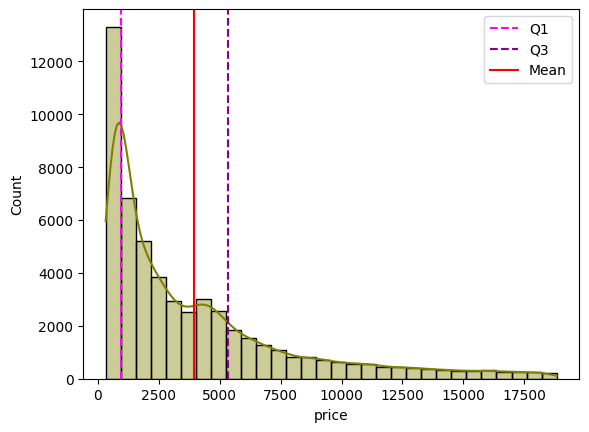

In [27]:
## 1. Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.
sns.histplot(df["price"], bins= 30, color= "olive", alpha= 0.4, kde=True)
plt.axvline(df["price"].quantile(0.25), color='magenta', linestyle='dashed', label= f"Q1")
plt.axvline(df["price"].quantile(0.75), color='darkmagenta', linestyle='dashed', label= f"Q3")
plt.axvline(df["price"].mean(), color='red', label=f"Mean")
plt.legend();

In [28]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lim_lower = Q1 - 1.5 * IQR
lim_upper=  Q3 + 1.5 * IQR
outliers= (df["price"] < lim_lower) | (df["price"] > lim_upper)
no_outliers= (df["price"] >= lim_lower) & (df["price"] <= lim_upper)
df_con_outliers = df[outliers]
df_sin_outliers= df[no_outliers]

In [29]:
print(f"Total de no-outliers: {len(df_sin_outliers)}")
print(f"Total de outliers: {len(df_con_outliers)}")
print(f"Limite inferior: {lim_lower}")
print(f"Limite superior: {lim_upper}")

Total de no-outliers: 50403
Total de outliers: 3537
Limite inferior: -5613.5
Limite superior: 11886.5


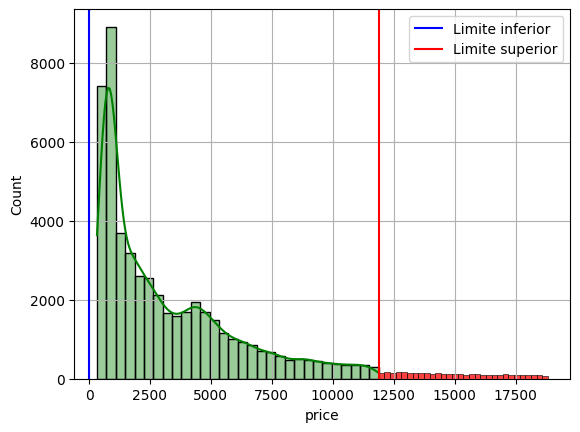

In [30]:
sns.histplot(df_sin_outliers["price"], bins= 30, color= "green", alpha= 0.4, kde=True)
sns.histplot(df_con_outliers["price"], bins= 30, color= "red")
plt.axvline(0, color = "blue", label= f"Limite inferior") # es negativo
plt.axvline(lim_upper, color = "red", label= f"Limite superior")
plt.grid()
plt.legend();

In [31]:
## 2 Asimetría y curtosis.

Asimetría: 1.62 = El precio tiene asimetría positiva, la cola es más larga hacia la derecha
Curtosis: 2.18 = Inferior a 3, cola ligera y con menos valores extremos


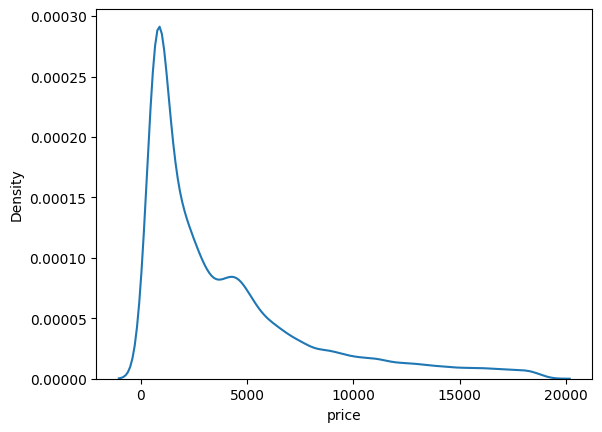

In [32]:
# Coeficiente de asimetría y curtosis del precio.
print(f"Asimetría: {df["price"].skew().round(2)} = El precio tiene asimetría positiva, la cola es más larga hacia la derecha")
print(f"Curtosis: {df["price"].kurtosis().round(2)} = Inferior a 3, cola ligera y con menos valores extremos")

sns.kdeplot(df, x= "price");

In [33]:
# Transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. 
df_filtrada = df_sin_outliers.copy()
df_filtrada["price_log"] = df_filtrada["price"].apply(np.log)
df_filtrada.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen,price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,394.46,293.4,38.20,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,394.46,326.0,34.51,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,395.67,327.0,38.08,5.789960


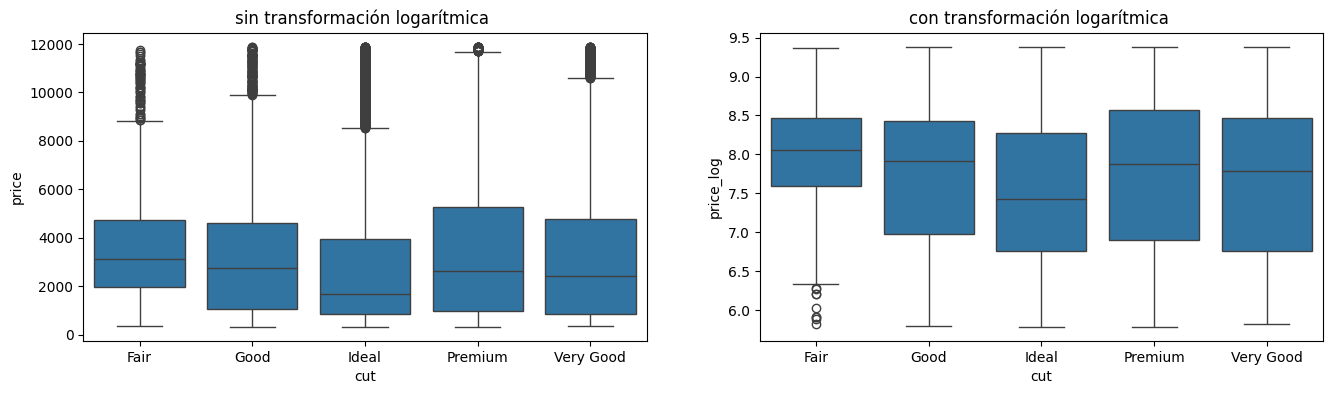

In [34]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) 
sns.boxplot(df_filtrada, x= "cut", y= "price")
plt.title("sin transformación logarítmica ")

plt.subplot(1, 2, 2) 
sns.boxplot(df_filtrada, x= "cut", y= "price_log")
plt.title("con transformación logarítmica ");

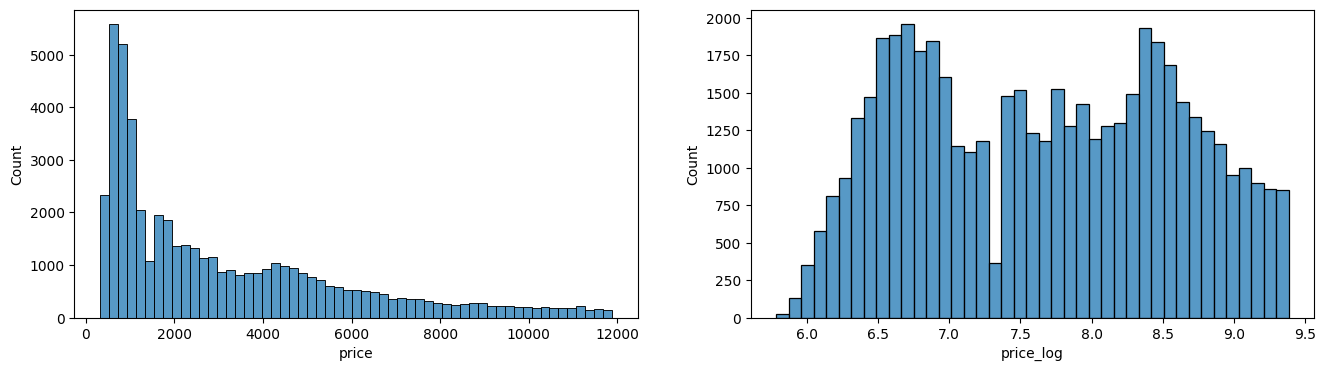

In [35]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) 
sns.histplot(df_filtrada["price"])
plt.subplot(1, 2, 2) 
sns.histplot(df_filtrada["price_log"]);

In [36]:
## 3 Discretizar la columna precio por barato, medio, caro usando la función pd.cut

In [37]:
labels = ["barato", "medio", "caro"]
df["rango_precio"] = pd.cut(df["price"], bins= 3, labels=labels)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,price_iva,price_discount,volumen,rango_precio
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,394.46,293.4,38.20,barato
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,394.46,326.0,34.51,barato
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,395.67,327.0,38.08,barato


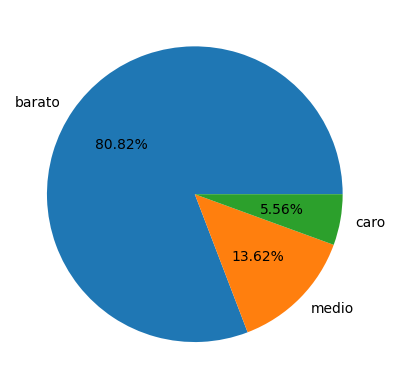

In [38]:
plt.pie(x=df["rango_precio"].value_counts(), labels = df["rango_precio"].unique(), autopct="%1.2f%%");

## PARTE 4: Visualizaciones - Seaborn EDAS

In [39]:
## 1 - Univariantes:

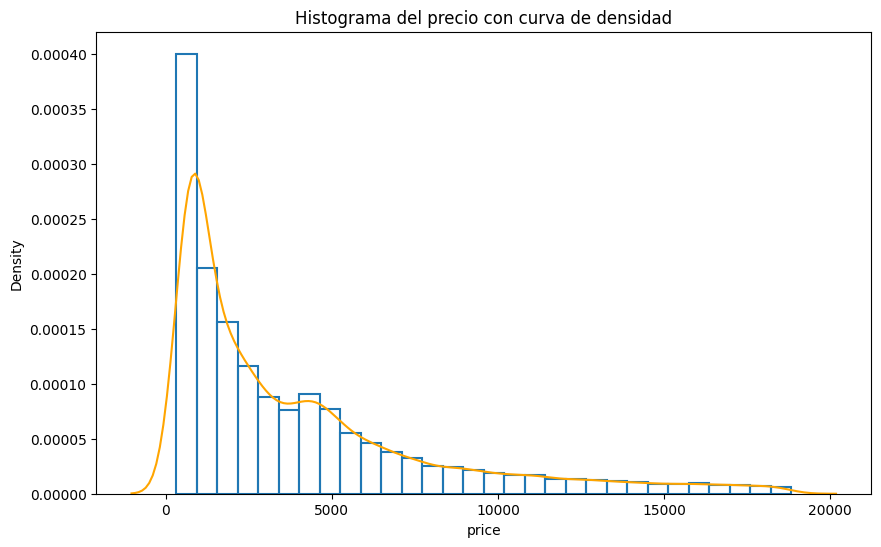

In [40]:
# histogramas y curvas de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins= 30, stat="density", fill=False)
sns.kdeplot(df["price"], color="orange")
plt.title("Histograma del precio con curva de densidad");

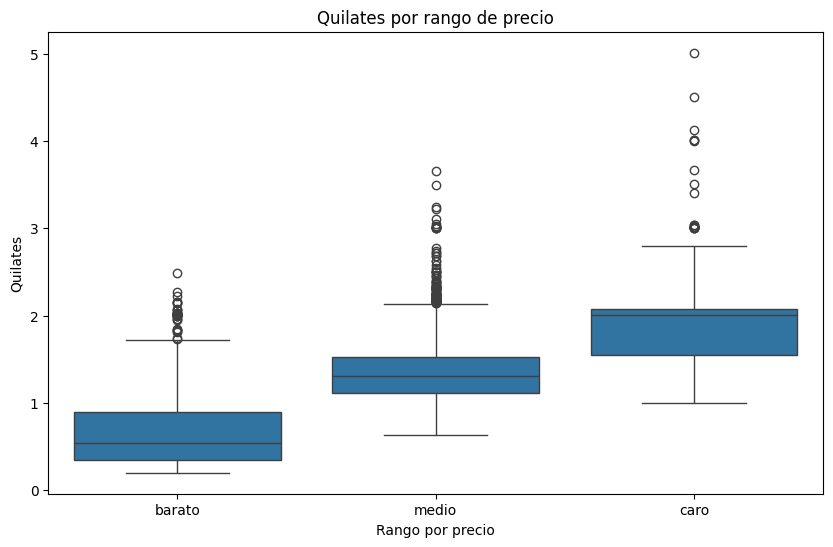

In [41]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df, x="rango_precio", y="carat")
plt.title("Quilates por rango de precio")
plt.xlabel("Rango por precio")
plt.ylabel("Quilates");

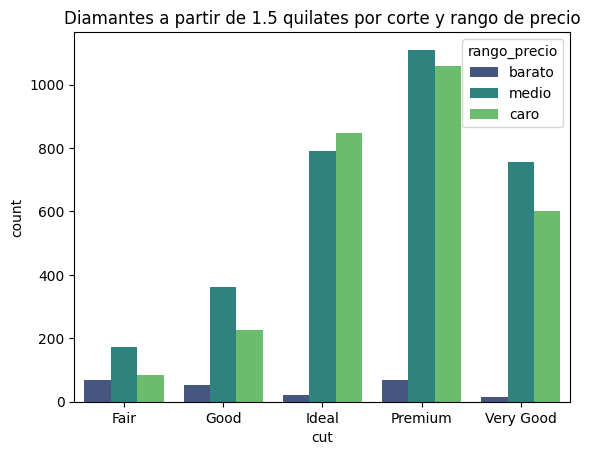

In [42]:
# countplot
sns.countplot(data = df[df["carat"] >= 1.5], x= "cut", hue= "rango_precio", palette="viridis")
plt.title("Diamantes a partir de 1.5 quilates por corte y rango de precio");

In [43]:
## 2 bivariantes y multivariantes:
# Hacer la correlación en un gráfico de barras para la columna 'price'
# Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn

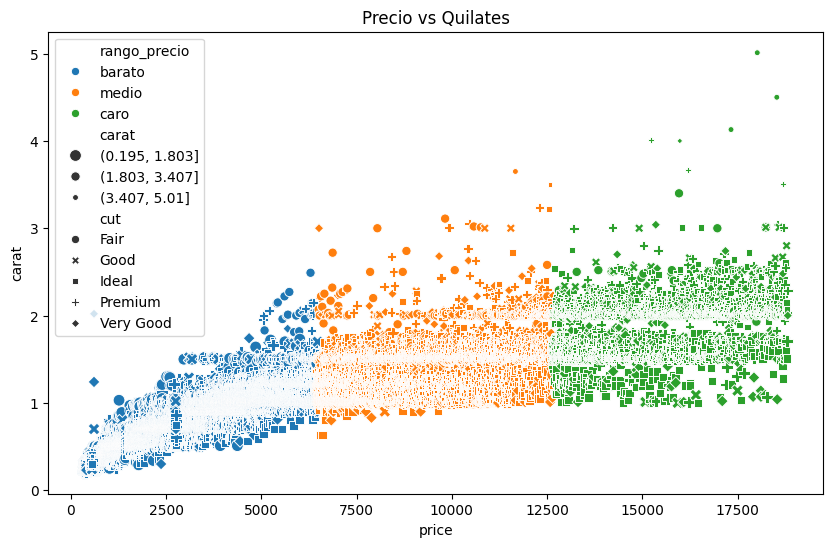

In [46]:
# scatterplot con hue, con size, con style
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x= "price", y="carat", 
                hue="rango_precio", 
                size=pd.cut(df["carat"], bins= 3), 
                style="cut")
plt.title("Precio vs Quilates");

In [47]:
# Calcular correlación con Pandas y mostrarla con seaborn

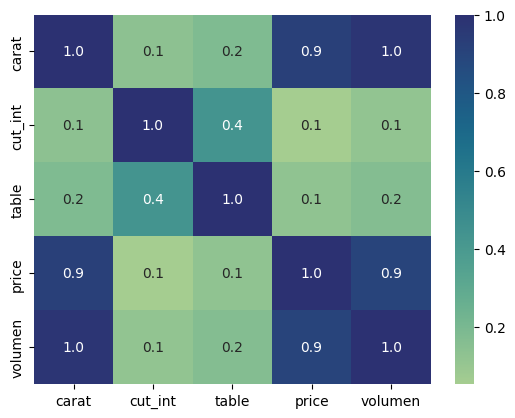

In [99]:
sns.heatmap(df[["carat","cut_int", "table", "price", "volumen"]].corr(), annot=True, fmt=".1f", cmap="crest");

In [95]:
df_num= df[["carat","depth", "cut_int", "table", "price", "volumen"]]
df_rango_dummies= pd.get_dummies(df["rango_precio"])
df_concat = pd.concat([df_num, df_rango_dummies], axis=1)
df_concat

,carat,depth,cut_int,table,price,volumen,barato,medio,caro
0,0.23,61.5,1,55.0,326,38.20,True,False,False
1,0.21,59.8,2,61.0,326,34.51,True,False,False
2,0.23,56.9,4,65.0,327,38.08,True,False,False
3,0.29,62.4,2,58.0,334,46.72,True,False,False
4,0.31,63.3,4,58.0,335,51.92,True,False,False
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,1,57.0,2757,115.92,True,False,False
53936,0.72,63.1,4,55.0,2757,118.11,True,False,False
53937,0.70,62.8,3,60.0,2757,114.45,True,False,False
53938,0.86,61.0,2,58.0,2757,140.77,True,False,False


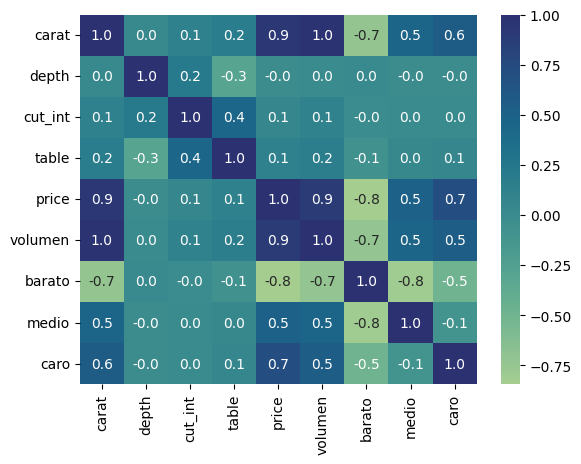

In [96]:
sns.heatmap(df_concat.corr(), annot=True, fmt=".1f", cmap="crest");